# Data modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('ds-tech-interview/train_data_preparation.csv')

In [3]:
df_test = pd.read_csv('ds-tech-interview/test_data_preparation.csv')

## Model : 

### Specify which variable we want to target

In [4]:
y = df_train['TARGET_FLAG']

### Specify which variable we want to take as parameters

In [5]:
X = df_train[['KIDSDRIV_BIN', 'HOMEKIDS_BIN', 'URBANICITY_INDEX', 'HOME_VAL_BIN', 'logMVR_PTS', 'REVOKED_INDEX', 'logCLM_FREQ', 'CLM_FREQ', 'OLDCLAIM', 'CAR_TYPE_INDEX', 'TIF', 'logBLUEBOOK', 'CAR_USE_INDEX', 'logTRAVTIME', 'EDUCATION_BIN', 'MSTATUS_INDEX', 'logINCOME']]

### Cut dataframe into training and testing 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Testing several models

In [7]:
SVC_model = SVC()

In [8]:
KNN_model = KNeighborsClassifier(n_neighbors=100)

In [9]:
logreg_model = LogisticRegression(max_iter=300)

In [10]:
XGB_model = XGBClassifier()

In [11]:
RFC_model = RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

### Fitting training datas

In [12]:
SVC_model.fit(X_train, y_train)

SVC()

In [13]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [14]:
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [15]:
XGB_model.fit(X_train, y_train)

/Users/vic/PycharmProjects/DLenv/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
RFC_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=0)

### Testing model

In [17]:
SVC_prediction = SVC_model.predict(X_test)

In [18]:
KNN_prediction = KNN_model.predict(X_test)

In [19]:
logreg_prediction = logreg_model.predict(X_test)

In [20]:
XGB_prediction = XGB_model.predict(X_test)

In [21]:
RFC_prediction = RFC_model.predict(X_test)

### Accuracy score from SVC prediction

In [22]:
print(accuracy_score(SVC_prediction, y_test))

0.7383635472807447


### Accuracy score from KNN prediction

In [23]:
print(accuracy_score(KNN_prediction, y_test))

0.7383635472807447


### Accuracy score from logreg prediction

In [24]:
print(accuracy_score(logreg_prediction, y_test))

0.7687408133268006


### Accuracy score from XGB prediction

In [25]:
print(accuracy_score(XGB_prediction, y_test))

0.7775600195982362


### Accuracy score from RFC prediction

In [26]:
print(accuracy_score(RFC_prediction, y_test))

0.7834394904458599


### Print confusion matrix

In [27]:
print(confusion_matrix(SVC_prediction, y_test))

[[1507  534]
 [   0    0]]


In [28]:
print(confusion_matrix(KNN_prediction, y_test))

[[1506  533]
 [   1    1]]


In [29]:
print(confusion_matrix(logreg_prediction, y_test))

[[1379  344]
 [ 128  190]]


In [30]:
print(confusion_matrix(XGB_prediction, y_test))

[[1344  291]
 [ 163  243]]


In [31]:
print(confusion_matrix(RFC_prediction, y_test))

[[1429  364]
 [  78  170]]


### Print classification report

In [32]:
print(classification_report(SVC_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2041
           1       0.00      0.00      0.00         0

    accuracy                           0.74      2041
   macro avg       0.50      0.37      0.42      2041
weighted avg       1.00      0.74      0.85      2041



/Users/vic/PycharmProjects/DLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vic/PycharmProjects/DLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vic/PycharmProjects/DLenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2039
           1       0.00      0.50      0.00         2

    accuracy                           0.74      2041
   macro avg       0.50      0.62      0.43      2041
weighted avg       1.00      0.74      0.85      2041



In [34]:
print(classification_report(logreg_prediction, y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1723
           1       0.36      0.60      0.45       318

    accuracy                           0.77      2041
   macro avg       0.64      0.70      0.65      2041
weighted avg       0.83      0.77      0.79      2041



In [35]:
print(classification_report(XGB_prediction, y_test))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1635
           1       0.46      0.60      0.52       406

    accuracy                           0.78      2041
   macro avg       0.67      0.71      0.69      2041
weighted avg       0.80      0.78      0.79      2041



In [36]:
print(classification_report(RFC_prediction, y_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1793
           1       0.32      0.69      0.43       248

    accuracy                           0.78      2041
   macro avg       0.63      0.74      0.65      2041
weighted avg       0.87      0.78      0.81      2041



### Parameters importance for RFC method

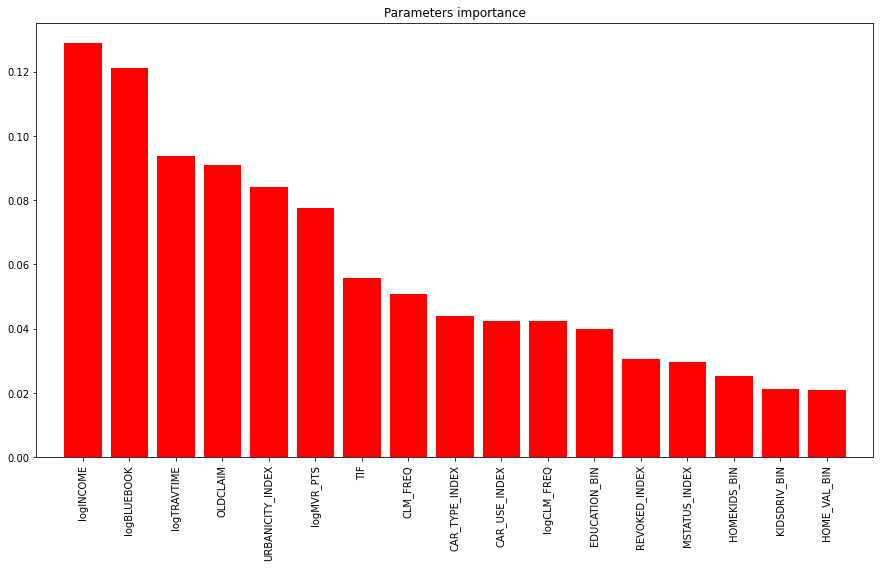

In [37]:
features = list(X.columns)
importances = RFC_model.feature_importances_
std = np.std([RFC_model.feature_importances_ for tree in RFC_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.title("Parameters importance")
plt.bar(
    range(X.shape[1]),
    importances[indices],
    color="r",
    yerr=std[indices],
    align="center",
)
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Find test TARGET_FLAG for RFC model only (better accuracy win) 

In [38]:
X_target = df_test[['KIDSDRIV_BIN', 'HOMEKIDS_BIN', 'URBANICITY_INDEX', 'HOME_VAL_BIN', 'logMVR_PTS', 'REVOKED_INDEX', 'logCLM_FREQ', 'CLM_FREQ', 'OLDCLAIM', 'CAR_TYPE_INDEX', 'TIF', 'logBLUEBOOK', 'CAR_USE_INDEX', 'logTRAVTIME', 'EDUCATION_BIN', 'MSTATUS_INDEX', 'logINCOME']]

In [39]:
final_target = RFC_model.predict(X_target)

In [40]:
df_test['TARGET_FLAG'] = final_target

In [41]:
df_test['TARGET_FLAG'].value_counts()

0    1856
1     285
Name: TARGET_FLAG, dtype: int64

In [42]:
df_test[['INDEX', 'TARGET_FLAG']].to_csv('ds-tech-interview/TARGET_FLAG.csv', index=False)